In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
fruit = pd.read_excel('fruit.xlsx')
fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [81]:
fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [82]:
fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [83]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
fruit['name'] = LE.fit_transform(fruit['name'])
fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

In [84]:
fruit.shape

(10000, 6)

In [85]:
fruit.duplicated().sum()

np.int64(0)

In [86]:
x = fruit.iloc[:, :-1].values
y = fruit.iloc[:, -1].values

In [87]:
x

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [88]:
y

array([1, 1, 1, ..., 0, 0, 0])

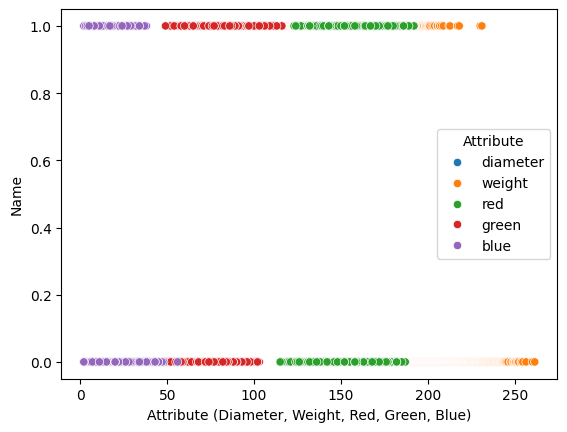

In [89]:
import matplotlib.pyplot as plt

long_fruit = fruit.melt(id_vars='name', value_vars=['diameter', 'weight', 'red', 'green', 'blue'], 
                        var_name='Attribute', value_name='Values')

sns.scatterplot(data=long_fruit, x='Values', y='name', hue='Attribute')
plt.xlabel("Attribute (Diameter, Weight, Red, Green, Blue)")
plt.ylabel("Name")
plt.legend(title="Attribute")
plt.show()


In [90]:
x

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [93]:
from sklearn.svm import SVC

modeling = SVC(kernel='linear')
modeling.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = modeling.predict(X_test_scaled)
modeling_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("akurasi SVM : {:.2f}%".format(modeling_acc*100))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       988
           1       0.98      0.93      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

akurasi SVM : 95.15%


In [95]:
import pickle
filename = 'fruit_SVM.pkl'
pickle.dump(SVC, open(filename,'wb'))

In [96]:
scaler_file = 'scaler_svm.pkl'
with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)